<h1 style="color: aquamarine;" align="center">Prototype - Probability of Becoming an Instagram Influencer</h1>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, plot_confusion_matrix
from collections import Counter 

**For watermark to regognize sklearn as an imported package, I had to import sklearn directly (i.e. not "from x import y").**

In [2]:
import sklearn

For context, visit [my repository!](https://github.com/the-exceptional-exception/probability-of-becoming-an-influencer)

Assume reliable data has been collected without any ethical violations. For the purpose of demonstration, I have come up with some data of how it COULD be (i.e. these data are **meaningless**).

<h2 style="color: deeppink;">Read influencers.csv into Pandas DataFrame:</h2>

In [3]:
df = pd.read_csv('influencers.csv')
df

,Sex,Age,Influencer
0,Female,19,1
1,Female,21,1
2,Female,21,1
3,Female,23,1
4,Female,24,1
...,...,...,...
19995,Male,63,0
19996,Male,64,0
19997,Male,64,0
19998,Male,64,0


<h2 style="color: deeppink;">Create dummy variables (value: 0 or 1):</h2>

In [4]:
df = pd.get_dummies(df)
df

,Age,Influencer,Sex_Female,Sex_Male
0,19,1,1,0
1,21,1,1,0
2,21,1,1,0
3,23,1,1,0
4,24,1,1,0
...,...,...,...,...
19995,63,0,0,1
19996,64,0,0,1
19997,64,0,0,1
19998,64,0,0,1


<h2 style="color: deeppink;">Separate the target variable (Influencer) from the remaining data:</h2>

In [5]:
y = df['Influencer']
X = df.drop(columns = ['Influencer'])

In [6]:
X

,Age,Sex_Female,Sex_Male
0,19,1,0
1,21,1,0
2,21,1,0
3,23,1,0
4,24,1,0
...,...,...,...
19995,63,0,1
19996,64,0,1
19997,64,0,1
19998,64,0,1


In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Influencer, Length: 20000, dtype: int64

<h2 style="color: deeppink;">Split the data to allow cross-validation:</h2>

**Under different circumstances, I would have kept random_state=None. Currently, I am afraid that the results would not be stable enough.**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [9]:
X_train

,Age,Sex_Female,Sex_Male
19830,47,0,1
273,18,1,0
13591,19,0,1
14618,21,0,1
19198,36,0,1
...,...,...,...
18448,32,0,1
7985,28,1,0
18687,33,0,1
19776,45,0,1


In [10]:
y_train

19830    0
273      0
13591    0
14618    0
19198    0
        ..
18448    0
7985     0
18687    0
19776    0
14148    0
Name: Influencer, Length: 15000, dtype: int64

In [11]:
X_test

,Age,Sex_Female,Sex_Male
5393,23,1,0
15408,22,0,1
6799,26,1,0
2773,20,1,0
1877,19,1,0
...,...,...,...
13294,19,0,1
17044,26,0,1
8312,29,1,0
3871,21,1,0


In [12]:
y_test

5393     0
15408    0
6799     0
2773     0
1877     0
        ..
13294    0
17044    0
8312     0
3871     0
19376    0
Name: Influencer, Length: 5000, dtype: int64

<h2 style="color: deeppink;">Scale the age variable (new value: 0-1):</h2>

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train.insert(0, 'Age_Scaled', scaler.fit_transform(X_train['Age'].values.reshape(-1, 1)))
X_train

,Age_Scaled,Age,Sex_Female,Sex_Male
19830,0.617021,47,0,1
273,0.000000,18,1,0
13591,0.021277,19,0,1
14618,0.063830,21,0,1
19198,0.382979,36,0,1
...,...,...,...,...
18448,0.297872,32,0,1
7985,0.212766,28,1,0
18687,0.319149,33,0,1
19776,0.574468,45,0,1


In [15]:
X_test.insert(0, 'Age_Scaled', scaler.transform(X_test['Age'].values.reshape(-1, 1)))
X_test

,Age_Scaled,Age,Sex_Female,Sex_Male
5393,0.106383,23,1,0
15408,0.085106,22,0,1
6799,0.170213,26,1,0
2773,0.042553,20,1,0
1877,0.021277,19,1,0
...,...,...,...,...
13294,0.021277,19,0,1
17044,0.170213,26,0,1
8312,0.234043,29,1,0
3871,0.063830,21,1,0


<h2 style="color: deeppink;">Remove the raw age:</h2>

In [16]:
X_train = X_train.drop(columns = ['Age'])
X_train

,Age_Scaled,Sex_Female,Sex_Male
19830,0.617021,0,1
273,0.000000,1,0
13591,0.021277,0,1
14618,0.063830,0,1
19198,0.382979,0,1
...,...,...,...
18448,0.297872,0,1
7985,0.212766,1,0
18687,0.319149,0,1
19776,0.574468,0,1


In [17]:
X_test = X_test.drop(columns = ['Age'])
X_test

,Age_Scaled,Sex_Female,Sex_Male
5393,0.106383,1,0
15408,0.085106,0,1
6799,0.170213,1,0
2773,0.042553,1,0
1877,0.021277,1,0
...,...,...,...
13294,0.021277,0,1
17044,0.170213,0,1
8312,0.234043,1,0
3871,0.063830,1,0


<h2 style="color: deeppink;">Train logistic regression model:</h2>

**Note that without class weights, the probabilities of becoming an influencer will be so low that no one will receive the class label "Influencer" and the model would become rather pointless. To simplify, the main objective is not to maximize the accuracy.**

In [18]:
model = LogisticRegression(class_weight = {0: 0.00112, 1: 0.99888}).fit(X_train, y_train)

<h2 style="color: deeppink;">Evaluate logistic regression model:</h2>

**For the time being, the probabilities of becoming an influencer (floating point numbers located to the right in the output array below) are unrealistically high. However, it is still possible to compare them.**

In [19]:
proba_test = model.predict_proba(X_test)
proba_test

array([[0.55807995, 0.44192005],
       [0.63752277, 0.36247723],
       [0.55348496, 0.44651504],
       ...,
       [0.54888082, 0.45111918],
       [0.56113781, 0.43886219],
       [0.61428629, 0.38571371]])

In [20]:
labels_test = model.predict(X_test)
labels_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**7 out of the 5000 test "persons" receive the class label "Influencer" (i.e. 1):**

In [21]:
Counter(labels_test)

Counter({0: 4993, 1: 7})

**8 out of the 5000 test "persons" are influencers (i.e. 1):**

In [22]:
Counter(y_test)

Counter({0: 4992, 1: 8})

**Yet, the log loss is alarmingly high (caused by many probabilities being close to 0.5, i.e. "uncertain guesses"):**

In [23]:
print(f'Log loss = {log_loss(y_test, proba_test)}')

Log loss = 0.535056378011711


**Classification report:**

In [24]:
print(classification_report(y_test, labels_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4992
           1       0.00      0.00      0.00         8

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000



**Confusion matrix:**

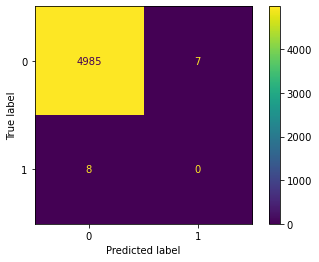

In [25]:
plot_confusion_matrix(model, X_test, y_test)

### Note that a different result can be obtained by changing some parameters. Feel free to make some adjustments and rerun everything to see how the result is affected! For instance, a lower log loss can be achieved by altering the class_weight (e.g. class_weight = {0: 0.1, 1: 0.9}). However, be aware that you might need to add zero_division = 1 to the classification_report function.

<h1 style="color: aquamarine;" align="center">User interface</h1>

<h2 style="color: deeppink;">Seaborn heatmap:</h2>

**With only two input characteristics it is easy to display a 2D heatmap with all possible combinations. Note that the heatmap is not interactive.**

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Create Pandas DataFrame with the probabilities for all possible age-sex combinations (multiple steps):**

<p style="color: slategray;">1. Create a NumPy array with all allowed ages:</p>

In [27]:
age_range = np.arange(18, 66)
age_range

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

<p style="color: slategray;">2. Scale ages:</p>

In [28]:
ages_scaled = scaler.transform(age_range.reshape(-1, 1)).reshape(-1)
ages_scaled

array([0.        , 0.0212766 , 0.04255319, 0.06382979, 0.08510638,
       0.10638298, 0.12765957, 0.14893617, 0.17021277, 0.19148936,
       0.21276596, 0.23404255, 0.25531915, 0.27659574, 0.29787234,
       0.31914894, 0.34042553, 0.36170213, 0.38297872, 0.40425532,
       0.42553191, 0.44680851, 0.46808511, 0.4893617 , 0.5106383 ,
       0.53191489, 0.55319149, 0.57446809, 0.59574468, 0.61702128,
       0.63829787, 0.65957447, 0.68085106, 0.70212766, 0.72340426,
       0.74468085, 0.76595745, 0.78723404, 0.80851064, 0.82978723,
       0.85106383, 0.87234043, 0.89361702, 0.91489362, 0.93617021,
       0.95744681, 0.9787234 , 1.        ])

<p style="color: slategray;">3. Compute the number of rows that will be present in the Pandas DataFrames (and the heatmap):</p>

In [29]:
num_rows = len(age_range)
num_rows

48

<p style="color: slategray;">4. Create Pandas DataFrames with scaled ages and dummy variables for both sexes:</p>

In [30]:
df_female = pd.DataFrame({'Age_Scaled': ages_scaled, 'Sex_Female': np.ones(num_rows, dtype = int), 'Sex_Male': np.zeros(num_rows, dtype = int)}, index = age_range)
df_female

,Age_Scaled,Sex_Female,Sex_Male
18,0.000000,1,0
19,0.021277,1,0
20,0.042553,1,0
21,0.063830,1,0
22,0.085106,1,0
23,0.106383,1,0
24,0.127660,1,0
25,0.148936,1,0
26,0.170213,1,0
27,0.191489,1,0


In [31]:
df_male = pd.DataFrame({'Age_Scaled': ages_scaled, 'Sex_Female': np.zeros(num_rows, dtype = int), 'Sex_Male': np.ones(num_rows, dtype = int)}, index = age_range)
df_male

,Age_Scaled,Sex_Female,Sex_Male
18,0.000000,0,1
19,0.021277,0,1
20,0.042553,0,1
21,0.063830,0,1
22,0.085106,0,1
23,0.106383,0,1
24,0.127660,0,1
25,0.148936,0,1
26,0.170213,0,1
27,0.191489,0,1


<p style="color: slategray;">5. Predict <strong>influencer</strong>-probabilities for both sexes:</p>

In [32]:
proba_female = model.predict_proba(df_female)
proba_female = np.delete(proba_female, 0, axis = 1).reshape(-1)
proba_female

array([0.43428416, 0.43580896, 0.43733498, 0.43886219, 0.44039055,
       0.44192005, 0.44345065, 0.44498232, 0.44651504, 0.44804877,
       0.4495835 , 0.45111918, 0.4526558 , 0.45419332, 0.45573171,
       0.45727095, 0.45881101, 0.46035185, 0.46189345, 0.46343578,
       0.46497881, 0.46652251, 0.46806685, 0.4696118 , 0.47115734,
       0.47270343, 0.47425004, 0.47579715, 0.47734472, 0.47889273,
       0.48044114, 0.48198993, 0.48353907, 0.48508852, 0.48663825,
       0.48818825, 0.48973847, 0.49128889, 0.49283948, 0.4943902 ,
       0.49594103, 0.49749195, 0.4990429 , 0.50059388, 0.50214485,
       0.50369577, 0.50524663, 0.50679738])

In [33]:
proba_male = model.predict_proba(df_male)
proba_male = np.delete(proba_male, 0, axis = 1).reshape(-1)
proba_male

array([0.35676243, 0.35818739, 0.35961485, 0.36104481, 0.36247723,
       0.36391209, 0.36534939, 0.36678908, 0.36823116, 0.36967559,
       0.37112237, 0.37257146, 0.37402284, 0.37547649, 0.37693239,
       0.37839052, 0.37985084, 0.38131335, 0.38277801, 0.3842448 ,
       0.38571371, 0.38718469, 0.38865774, 0.39013282, 0.39160991,
       0.393089  , 0.39457004, 0.39605303, 0.39753793, 0.39902471,
       0.40051336, 0.40200385, 0.40349616, 0.40499025, 0.4064861 ,
       0.40798369, 0.409483  , 0.41098398, 0.41248663, 0.4139909 ,
       0.41549679, 0.41700425, 0.41851327, 0.42002381, 0.42153585,
       0.42304937, 0.42456433, 0.42608071])

<p style="color: slategray;">6. Put together the final Pandas DataFrame with the probabilities for all age-sex combinations:</p>

In [34]:
df_proba = pd.DataFrame({'Female': proba_female, 'Male': proba_male}, index = age_range)
df_proba

,Female,Male
18,0.434284,0.356762
19,0.435809,0.358187
20,0.437335,0.359615
21,0.438862,0.361045
22,0.440391,0.362477
23,0.441920,0.363912
24,0.443451,0.365349
25,0.444982,0.366789
26,0.446515,0.368231
27,0.448049,0.369676


**Create the Seaborn heatmap with the probabilities for all possible age-sex combinations. This is what the users would see:**

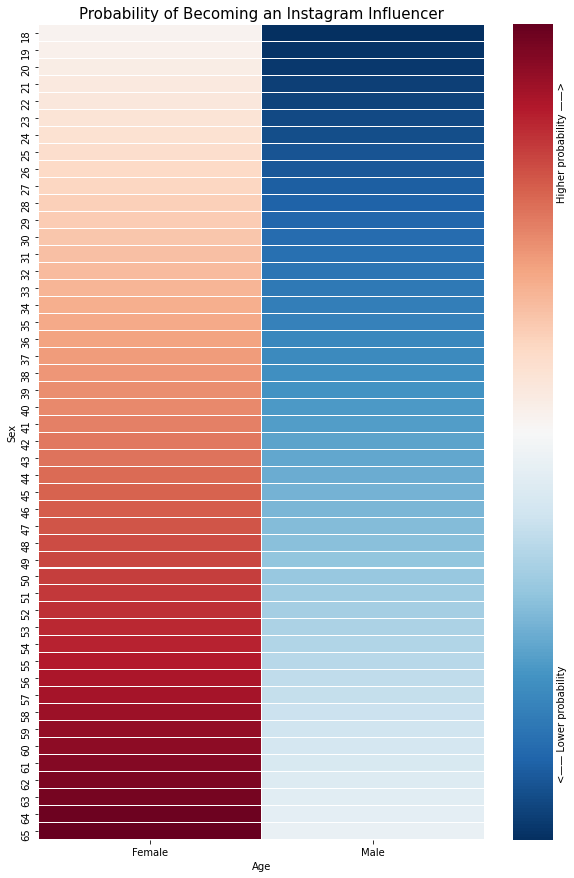

In [35]:
plt.figure(figsize = (10, 15))
plt.title('Probability of Becoming an Instagram Influencer', fontsize = 15)

cbar_kws = {'label': '<—— Lower probability                                                                                                                                                    Higher probability ——>', 'ticks': [0,0]}

ax = sns.heatmap(df_proba, cmap = 'RdBu_r', linewidths = .02, cbar_kws = cbar_kws)

ax.set(xlabel = 'Age', ylabel = 'Sex');

<h2 style="color: deeppink;">Interactive bar chart:</h2>

In [36]:
import ipywidgets as widgets

In [37]:
bars = ('Male 2', 'Male 1', 'Female 2', 'Female 1')
print('\nUse the sliders below to set the ages for four persons. The probability of becoming an Instagram influencer is estimated for   each of them and shown in the boxplots further down. Note that the sliders control both plots and the code for both plots is   the same, EXCEPT the scale on the x-axis. What impression do you get of each plot? Can the same data be used for yielding       "different" results?')

def proba_plot(Female_1, Female_2, Male_1, Male_2):
    
    # Prepare the data
    ages = np.array([Male_2, Male_1, Female_2, Female_1])
    ages_scaled = scaler.transform(ages.reshape(-1, 1)).reshape(-1)
    data = {'Age_Scaled': ages_scaled, 'Sex_Female': [0, 0, 1, 1], 'Sex_Male': [1, 1, 0, 0]}
    df_plot = pd.DataFrame(data, index = ['Male 2', 'Male 1', 'Female 2', 'Female 1'])
    proba_plot = model.predict_proba(df_plot)
    proba_plot = np.delete(proba_plot, 0, axis = 1).reshape(-1)
    
    # Create "blue" boxplot
    fig, ax = plt.subplots(figsize = (10, 3))
    ax.set_title('Probability of Becoming an Instagram Influencer')
    ax.barh(bars, proba_plot)
    ax.set_ylabel('Person')
    ax.set_xlabel('Probability')
    ax.set_xticks([0.25, 0.52, 2])
    ax.set_xticklabels(['lower', 'higher', ''])
    fig.text(0.695, 0.13, 'GitHub: @the-exceptional-exception', fontsize = 8,
             color = 'grey')
    
    # Create "pink" boxplot
    fig2, ax2 = plt.subplots(figsize = (10, 3))
    ax2.set_title('Probability of Becoming an Instagram Influencer')
    ax2.barh(bars, proba_plot, color = 'pink')
    ax2.set_ylabel('Person')
    ax2.set_xlabel('Probability')
    ax2.set_xticks([0.25, 0.52])
    ax2.set_xticklabels(['lower', 'higher'])
    fig2.text(0.695, 0.13, 'GitHub: @the-exceptional-exception', fontsize = 8,
             color = 'grey')

    plt.show() 
    
widgets.interact(proba_plot, Female_1 = (18,65), Female_2 = (18,65), Male_1 = (18,65), Male_2 = (18,65));


Use the sliders below to set the ages for four persons. The probability of becoming an Instagram influencer is estimated for   each of them and shown in the boxplots further down. Note that the sliders control both plots and the code for both plots is   the same, EXCEPT the scale on the x-axis. What impression do you get of each plot? Can the same data be used for yielding       "different" results?


interactive(children=(IntSlider(value=41, description='Female_1', max=65, min=18), IntSlider(value=41, descrip…

<h1 style = "color: aquamarine;" align = "center">Dependencies</h1>

In [38]:
%load_ext watermark

%watermark -v -p watermark

%watermark --iversions

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

watermark: 2.2.0

matplotlib: 3.3.4
seaborn   : 0.11.1
numpy     : 1.20.1
sklearn   : 0.24.1
pandas    : 1.2.4
ipywidgets: 7.6.3

